# Temporal Difference Learning

## Contents

- <a href="#Introduction"> Introduction </a>
- <a href="#Sarsa"> Sarsa </a>
- <a href="#Q-learning"> Q-learning </a>
- <a href="#Coding-Exercises"> Coding Exercises </a>

<br><br>

## Introduction

**`Temporal Difference learning is a combination of Monte Carlo ideas and dynamic programming (DP) ideas.`**
                                                                                                     - Sutton & Barto 2018


<br><br>

## Sarsa

#### Sarsa Equation

<img src='./image/SARSA_Equations_Sutton&Barto.jpg'>

#### Pshotdocode for Sarsa

<img src='./image/SARSAPshotdocode_Sutton&Barto.jpg'>

**Input:**

- `env`: An instance of an OpenAI Gym environment.
- `num_episodes`: The number of episodes that are generated through agent-environment interaction.
- `alpha`: The step-size parameter for the update step.
- `gamma`: The discount rate. It must be a value between 0 and 1, inclusive (default value: `1`).

**Output:**
- `Q`: A dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

<br><br>

## Q-learning

#### Q-learning Equation

<img src='./image/Q_learning_Equations_Sutton&Barto.jpg'>

#### Pshotdocode for Q-learning

<img src='./image/Q_LearningPshotdocode_Sutton&Barto.jpg'>

**Input:**

- `env`: An instance of an OpenAI Gym environment.
- `num_episodes`: The number of episodes that are generated through agent-environment interaction.
- `alpha`: The step-size parameter for the update step.
- `gamma`: The discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

**Output:**
- `Q`: A dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

<br><br><br><br>

## Coding Exercises

In this section, we'll go through the coding for Temporal Difference Learning coding exercises with Python and OpenAI gym environment.

We'll be using the OpenAI gym <a href='https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py'>CliffWalking</a> environment for this notebook.

In [1]:
# Importing the necessary packages 
import gym
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict, deque

In [2]:
# Let's create the OpenAI Gym 'CliffWalking-v0' environment
env = gym.make('CliffWalking-v0')

In [3]:
# Basic information about the environment
print('Instance:', env)
print('Observation Space:',env.observation_space.n)
print('Action Space:',env.action_space.n)

Instance: <CliffWalkingEnv<CliffWalking-v0>>
Observation Space: 48
Action Space: 4


In [4]:
class Temporal_Difference_Learning(object):
    def __init__(self):
        super(Temporal_Difference_Learning, self).__init__()
        pass
    
    def update_Q_SARSA(self, alpha, gamma, Q, state, action, reward, next_state=None, next_action=None):
        current = Q[state][action] 

        Qsa_next = Q[next_state][next_action] if next_state is not None else 0    
        target = reward + (gamma * Qsa_next)               
        new_value = current + (alpha * (target - current)) 
        return new_value
    
    def update_Q_SARSA_Max(self, alpha, gamma, Q, state, action, reward, next_state=None):
        current = Q[state][action]  
        Qsa_next = np.max(Q[next_state]) if next_state is not None else 0 
        target = reward + (gamma * Qsa_next)              
        new_value = current + (alpha * (target - current)) 
        return new_value
    
    def epsilon_greedy(self, Q, state, nA, eps):
        if random.random() > eps: 
            return np.argmax(Q[state])
        else:                     
            return random.choice(np.arange(env.action_space.n))
        
    def SARSA(self, env, num_episodes, alpha, gamma=1.0, plot_every=100):
        nA = env.action_space.n               
        Q = defaultdict(lambda: np.zeros(nA))  

        tmp_scores = deque(maxlen=plot_every)     
        avg_scores = deque(maxlen=num_episodes)   

        for i_episode in range(1, num_episodes+1):
            # monitor progress
            if i_episode % 100 == 0:
                print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
                sys.stdout.flush()   
            score = 0                                             
            state = env.reset()                                 

            eps = 1.0 / i_episode                                
            action = self.epsilon_greedy(Q, state, nA, eps)        

            while True:
                next_state, reward, done, info = env.step(action) 
                score += reward                                  
                if not done:
                    next_action = self.epsilon_greedy(Q, next_state, nA, eps)
                    Q[state][action] = self.update_Q_SARSA(alpha, gamma, Q, state, action, reward, next_state, next_action)

                    state = next_state     
                    action = next_action   
                if done:
                    Q[state][action] = self.update_Q_SARSA(alpha, gamma, Q, \
                                                      state, action, reward)
                    tmp_scores.append(score)   
                    break
            if (i_episode % plot_every == 0):
                avg_scores.append(np.mean(tmp_scores))

        plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
        plt.xlabel('Episode Number')
        plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
        plt.show()
        
        print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
        return Q
    
    
    def Q_learning(self, env, num_episodes, alpha, gamma=1.0, plot_every=100):
        nA = env.action_space.n                
        Q = defaultdict(lambda: np.zeros(nA)) 

        tmp_scores = deque(maxlen=plot_every)    
        avg_scores = deque(maxlen=num_episodes)  

        for i_episode in range(1, num_episodes+1):
            # monitor progress
            if i_episode % 100 == 0:
                print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
                sys.stdout.flush()
            score = 0                                            
            state = env.reset()                                  
            eps = 1.0 / i_episode                               

            while True:
                action = self.epsilon_greedy(Q, state, nA, eps)        
                next_state, reward, done, info = env.step(action)  
                score += reward                                    
                Q[state][action] = self.update_Q_SARSA_Max(alpha, gamma, Q, state, action, reward, next_state)        
                state = next_state                                
                if done:
                    tmp_scores.append(score)                       
                    break
            if (i_episode % plot_every == 0):
                avg_scores.append(np.mean(tmp_scores))

        plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
        plt.xlabel('Episode Number')
        plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
        plt.show()

        print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
        return Q
    
    def visualization(self, V):
        V = np.reshape(V, (4,12))
        fig = plt.figure(figsize=(15,5))
        ax = fig.add_subplot(111)
        im = ax.imshow(V, cmap='cool')
        for (j,i),label in np.ndenumerate(V):
            ax.text(i, j, np.round(label,3), ha='center', va='center', fontsize=14)
        plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
        plt.show()

In [5]:
# Instance of Temporal_Difference_Learning class
td = Temporal_Difference_Learning()

### Define the optimal state-value

c:\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


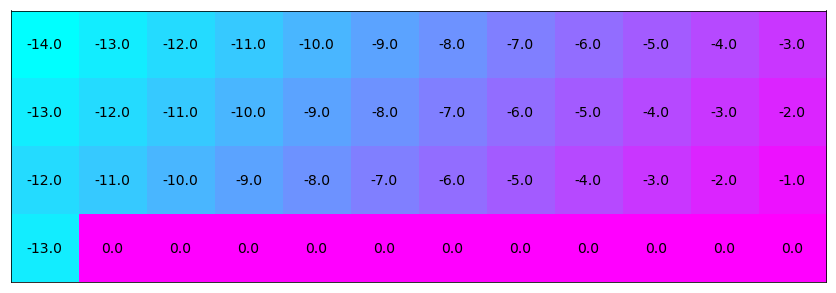

In [6]:
V_opt = np.zeros((4,12))
V_opt[0][0:13] = -np.arange(3, 15)[::-1]
V_opt[1][0:13] = -np.arange(3, 15)[::-1] + 1
V_opt[2][0:13] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

td.visualization(V_opt)

### Run SARSA

Episode 5000/5000

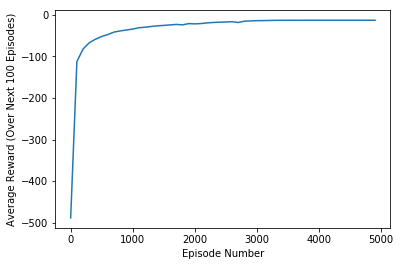

Best Average Reward over 100 Episodes:  -13.0

Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  1  1  1  2  2  1  1  1  1  1  2]
 [ 2  1  3  1  3  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


c:\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


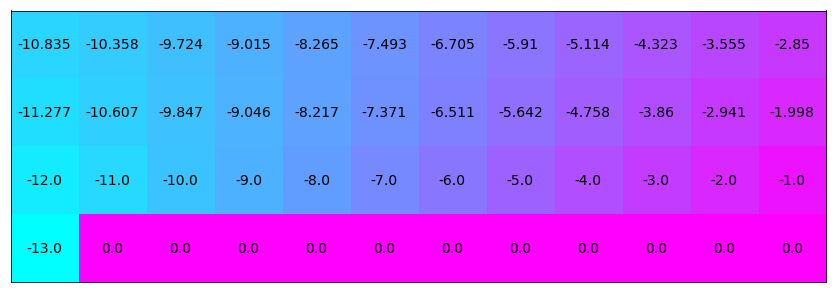

In [7]:
Q_sarsa = td.SARSA(env, 5000, .01)

policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)

print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
td.visualization(V_sarsa)

### Run Q-learning

Episode 5000/5000

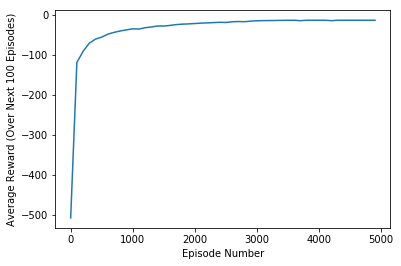

Best Average Reward over 100 Episodes:  -13.0

Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 2  0  1  1  1  0  1  1  1  1  2  1]
 [ 0  3  0  1  0  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


c:\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


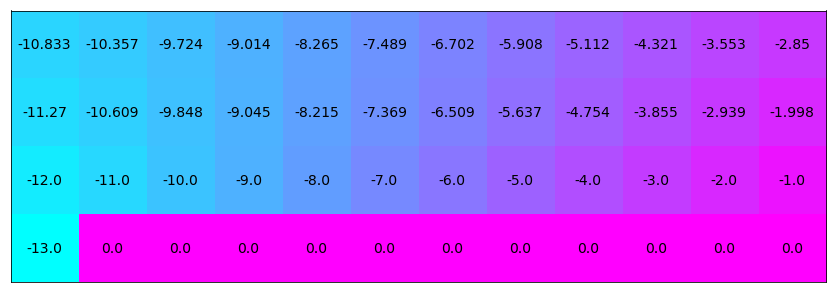

In [8]:
Q_sarsamax = td.Q_learning(env, 5000, .01)

policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))

print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

td.visualization([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

**`Image Cradit: Reinforcement Learning: An Introduction(2018) by Richard S. Sutton and Andrew G. Barto `**